Data Scientist Professional || Example Practical Exam 2

Data Validation: This data has 6738 rows and 9 columns. I have validated all variables and I have not made any changes after validation.
All the columns are just as described in the data dictionary:



In [2]:
# Without missing values. No cleaning is needed
# [model, year, price, transmission, mileage, fuelType, mpg, engineSize]
# [cat?, unique, numeric, categoric, numeric, categoric, numeric, num?]

In [3]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('toyota.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [6]:
for col in df.columns:
    unique_val = df[col].unique()
    nunique_val = df[col].nunique()
    print(f"{col} tiene {len(unique_val)} valores unicos de {nunique_val} valores posibles" )

model tiene 18 valores unicos de 18 valores posibles
year tiene 23 valores unicos de 23 valores posibles
price tiene 2114 valores unicos de 2114 valores posibles
transmission tiene 4 valores unicos de 4 valores posibles
mileage tiene 5699 valores unicos de 5699 valores posibles
fuelType tiene 4 valores unicos de 4 valores posibles
tax tiene 29 valores unicos de 29 valores posibles
mpg tiene 81 valores unicos de 81 valores posibles
engineSize tiene 16 valores unicos de 16 valores posibles


In [7]:
df.describe()


,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


Exploratory Analysis: I have investigated the target variable and features of the car, and the relationship between target variable and features. After the analysis, I decided to apply the following changes to enable modeling:

* Price: use log transformation

* Create a new ordinal variable from tax variable

Target Variable - Price: Since we need to predict the price, the price variable would be our target variable. 
From the histogram on the left below, we can see there is a longer right tail. Therefore, we apply log transformation of the price variable, the distribution on the right below is close to normal distribution.

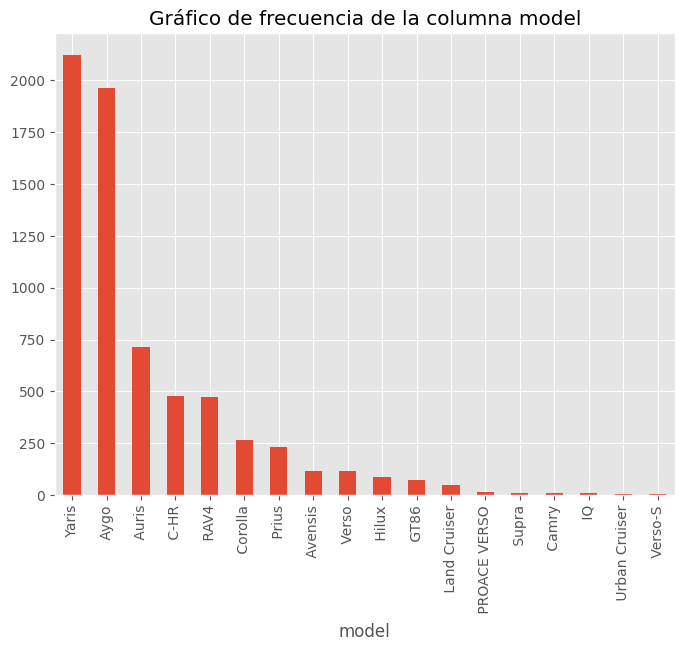

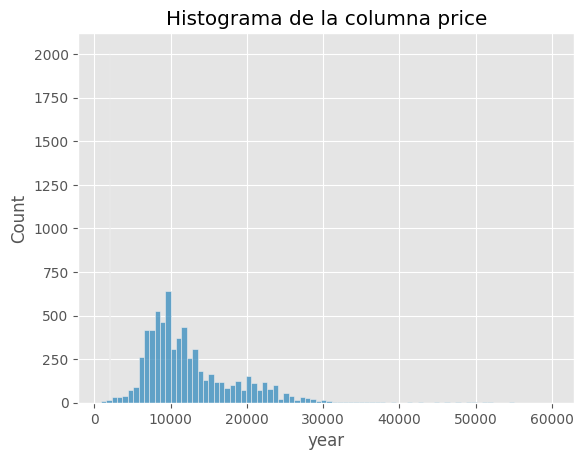

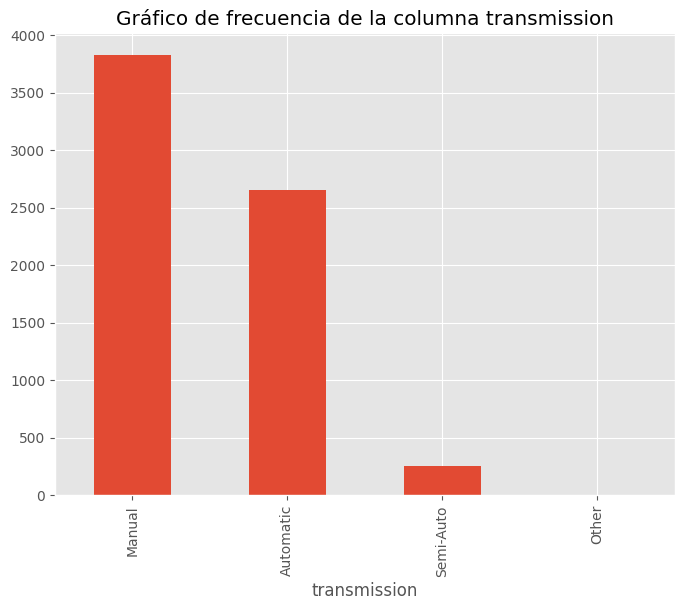

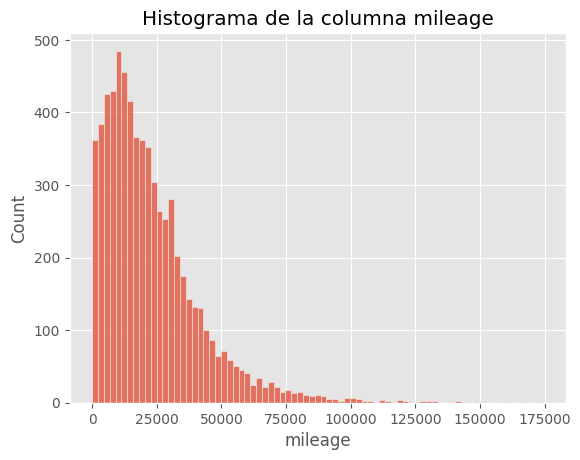

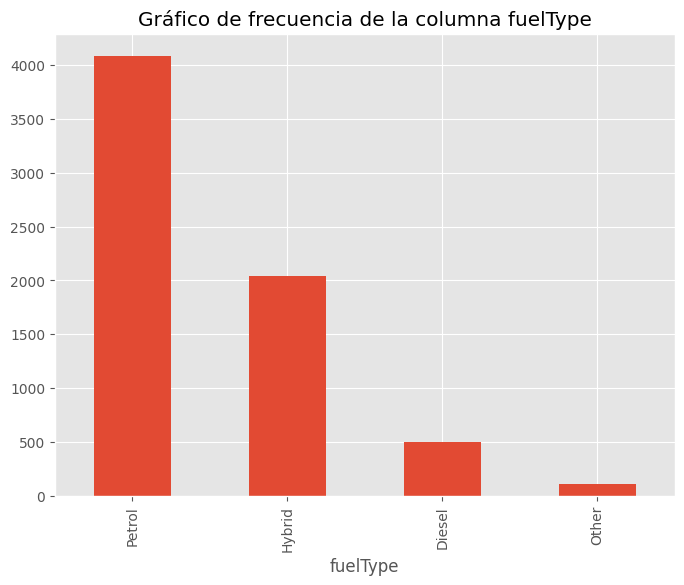

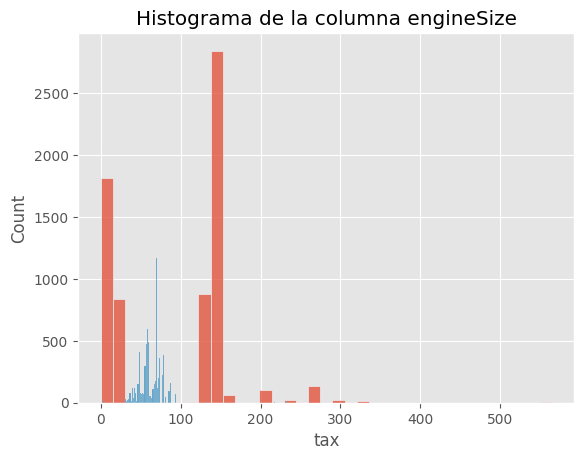

In [8]:
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        sns.histplot(df[col])
        plt.title(f"Histograma de la columna {col}")
    elif df[col].dtype == 'object':
        plt.figure(figsize=(8,6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f"Gráfico de frecuencia de la columna {col}")
        plt.show()

[Text(0.5, 1.0, 'The Distribution of Target Variable - Price(Log Scale)')]

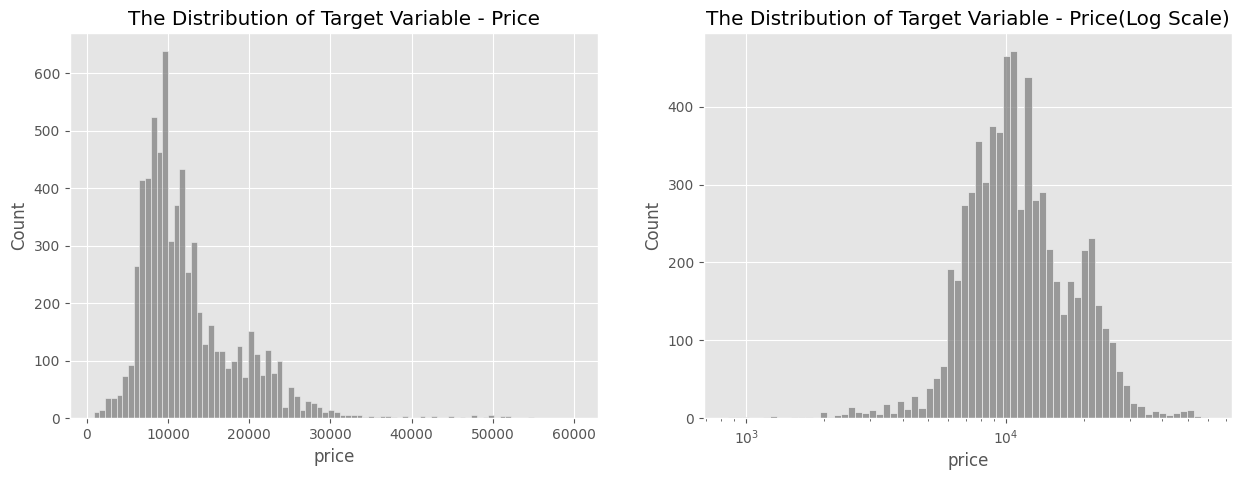

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df['price'], color='gray', ax=axes[0]).set(title='The Distribution of Target Variable - Price')
sns.histplot(df['price'], log_scale=True, color='gray', ax=axes[1]).set(title='The Distribution of Target Variable - Price(Log Scale)')

Numeric Variables - Mileage, Tax, mpg

From the heatmap below, we can conclude that there is a moderate linear negative relationship in two pairs of variables - price log transformation and mileage, tax and mpg.

[Text(0.5, 1.0, 'The Correlation Heatmap between Numeric Variables')]

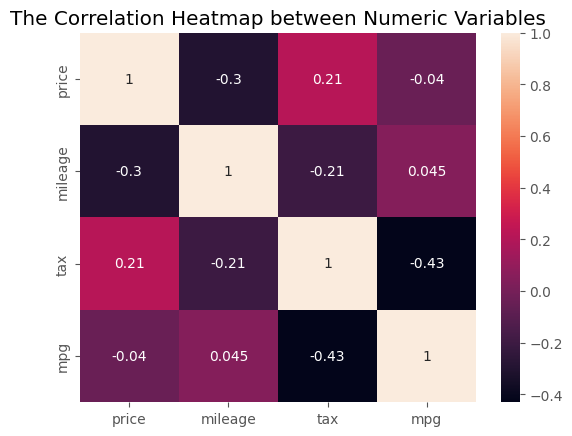

In [10]:
numeric = df[['price', 'mileage', 'tax', 'mpg']]
sns.heatmap(numeric.corr(), annot=True).set(title='The Correlation Heatmap between Numeric Variables')

Relationship between mpg, tax, mileage and price

To spot the non-linear relationship, I decided to make scatterplot to further investigate the relationship between mpg, tax, mileage and our target varible - price. From the scatterplots below, there is linear relationship between mileage and price. No relationship between price and mpg. I found out there is clusters in the scatterplot between price and tax, so I decided to create a new ordinal variable from the tax variable.

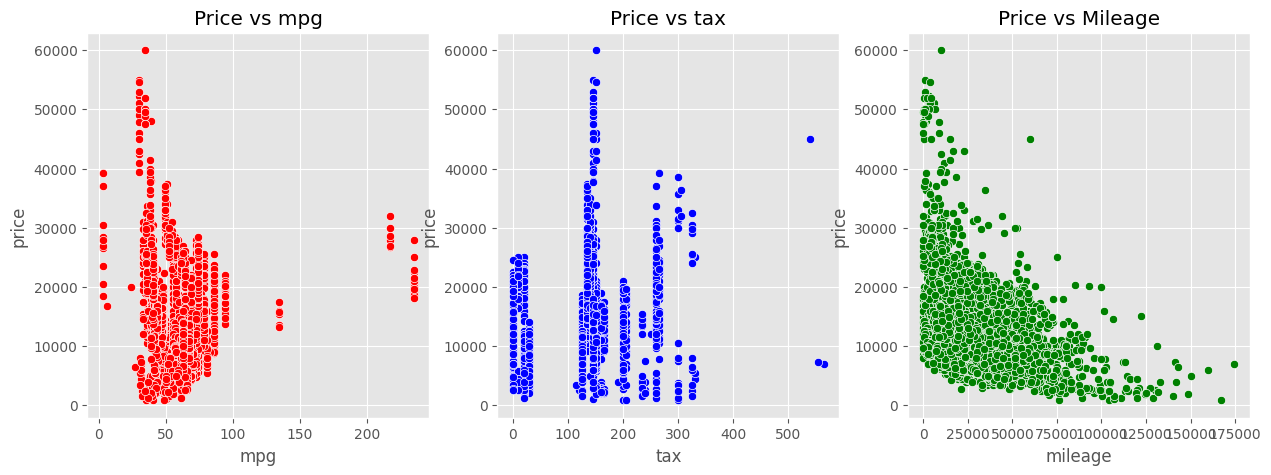

In [11]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(y=df['price'],x=df['mpg'],color='red',ax=axes[0]).set(title='Price vs mpg')
sns.scatterplot(y=df['price'],x=df['tax'],color='blue',ax=axes[1]).set(title='Price vs tax')
sns.scatterplot(y=df['price'],x=df['mileage'],color='green',ax=axes[2]).set(title='Price vs Mileage');

In [12]:
# Convert tax variable into an ordinal variable

# Selecciona las filas donde el valor de 'tax' es menor o igual a 100 y asigna el valor 1. 
df.loc[(df['tax'] <= 100,'tax')] = 1
# Selecciona las filas donde el valor de 'tax' está entre 100 y 200, y asigna el valor 2. 
df.loc[((df['tax'] <= 200) & (df['tax'] > 100) ,'tax')] = 2
# Selecciona las filas donde el valor de 'tax' está entre 200 y 300, y asigna el valor 3. 
df.loc[((df['tax'] <= 300) & (df['tax'] > 200) ,'tax')] = 3
# Selecciona las filas donde el valor de 'tax' es mayor a 300, y asigna el valor 4.
df.loc[(df['tax'] > 300 ,'tax')] = 4

Categorical Variables - Year, Engine Size, Model, Transmission, fuelType

Characteristics about Year, Engine size, Model, Transmission, and fuelType

Since year and engine size is most related to price, I checked their characteristics. From the bar chart below, the most common manufacture year is 2016. Also, the most common engine size in is 1.

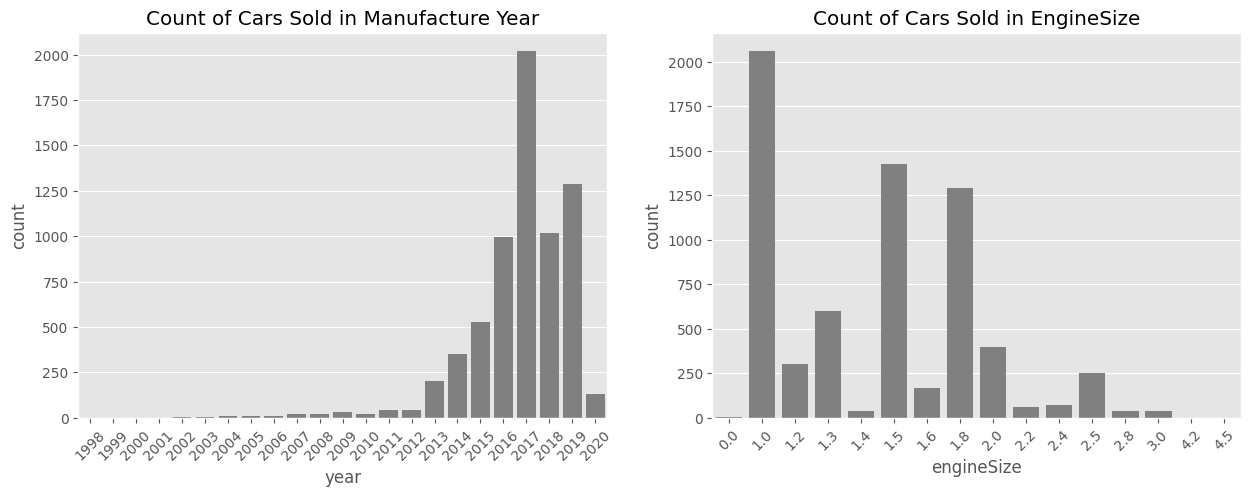

In [13]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['year'], color='gray',ax=axes[0]).set(title='Count of Cars Sold in Manufacture Year')
sns.countplot(x=df['engineSize'],color='gray',ax=axes[1]).set(title='Count of Cars Sold in EngineSize')
axes[0].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='x', labelrotation=45);

From the bar charts below, we can see the most frequent categories in model, transmission and fuelType variables - Yaris, Manual, Petrol in the dataset.

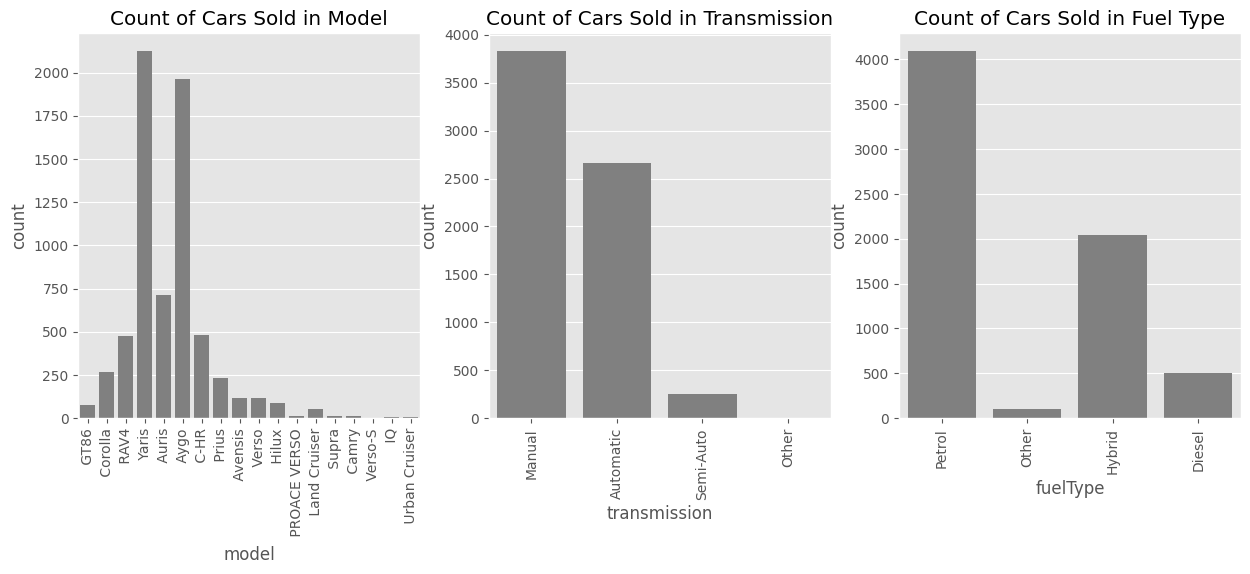

In [14]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x=df['model'],color='gray',ax=axes[0]).set(title='Count of Cars Sold in Model')
sns.countplot(x=df['transmission'],color='gray',ax=axes[1]).set(title='Count of Cars Sold in Transmission')
sns.countplot(x=df['fuelType'],color='gray',ax=axes[2]).set(title='Count of Cars Sold in Fuel Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

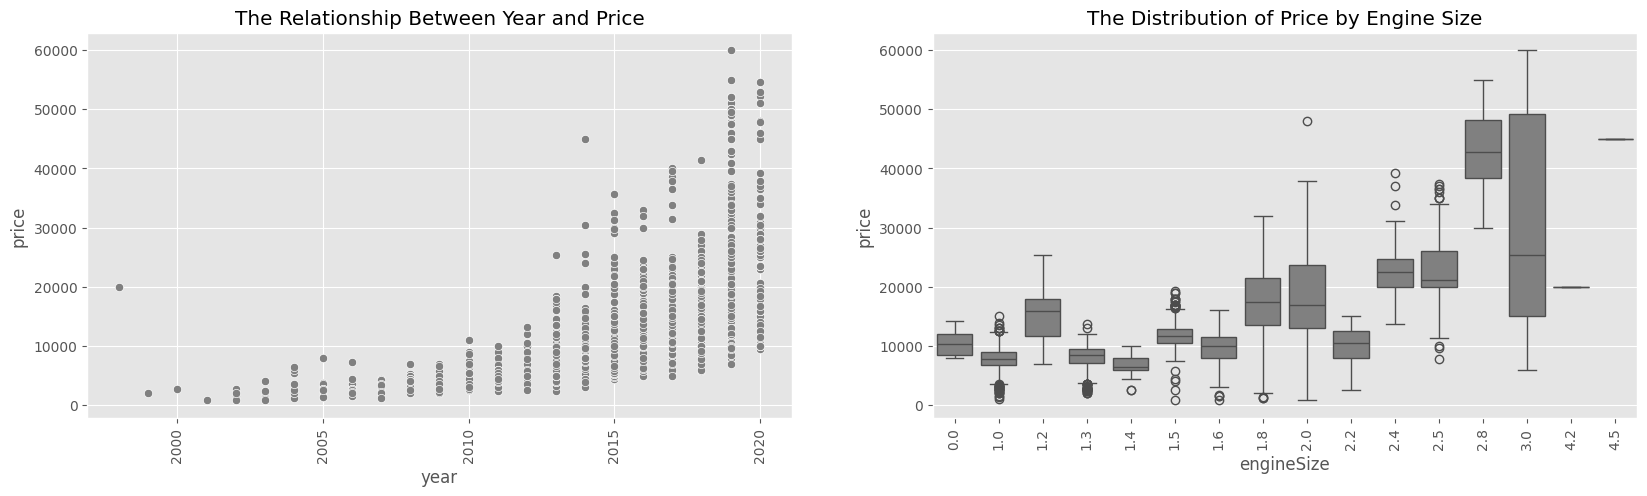

In [15]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(data=df, x='year',y='price',color='gray', ax=axes[0]).set(title='The Relationship Between Year and Price')
sns.boxplot(data=df, x='engineSize',y='price',color='gray', ax=axes[1]).set(title='The Distribution of Price by Engine Size')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

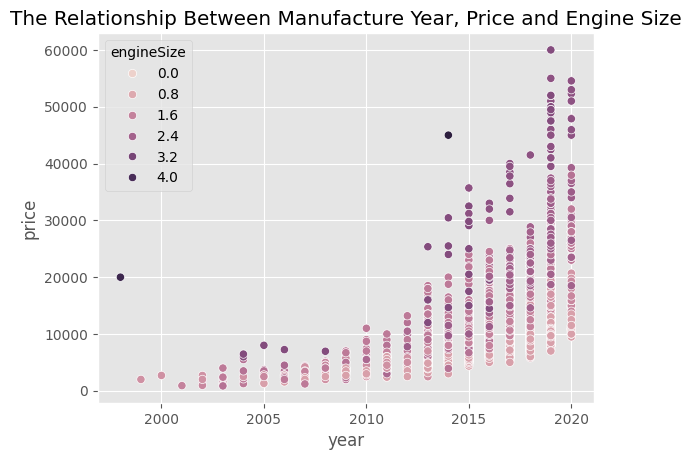

In [16]:
sns.scatterplot(data=df, x='year',y='price',color='gray', hue='engineSize').set(title='The Relationship Between Manufacture Year, Price and Engine Size');

Relationship between Model, Transmission, fuelType and price

I also investigated their relationship between price. From the boxplots below, we can see there is a difference in distribution of prices among each categories in each variable

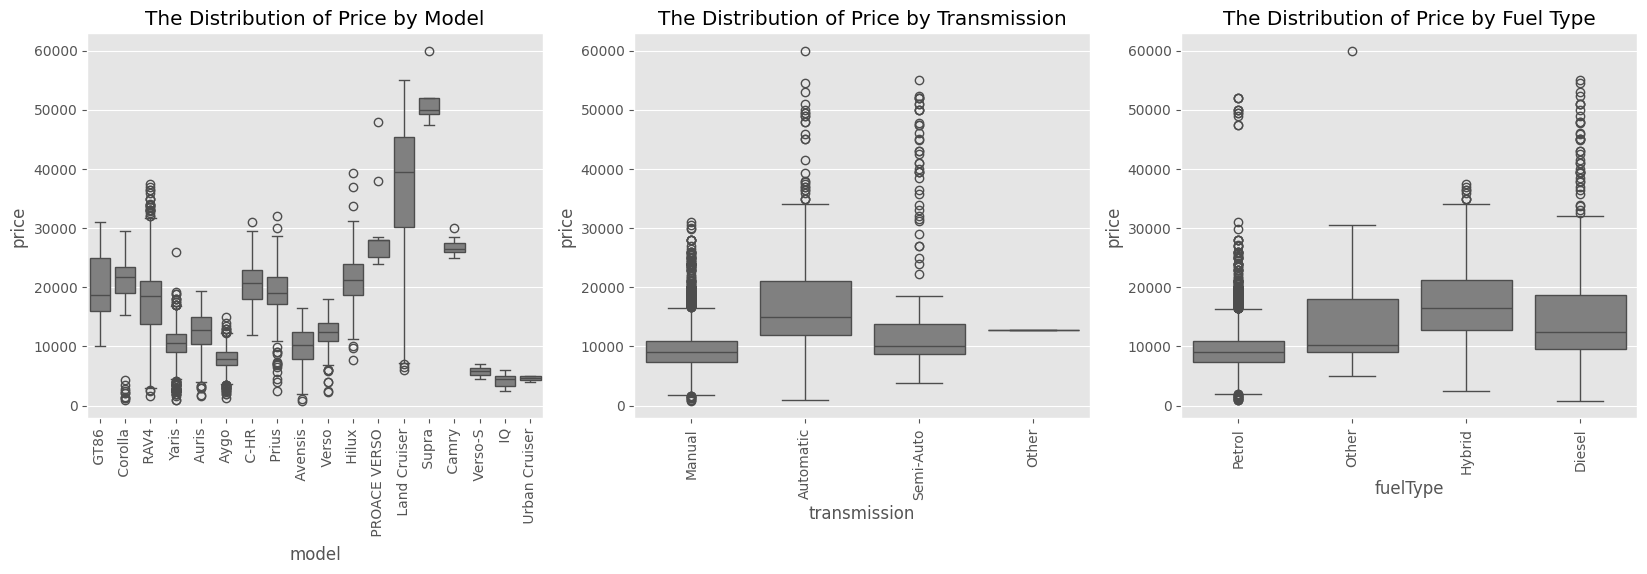

In [17]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(data=df, x='model',y='price',color='gray',ax=axes[0]).set(title='The Distribution of Price by Model')
sns.boxplot(data=df, x='transmission',y='price',color='gray',ax=axes[1]).set(title='The Distribution of Price by Transmission')
sns.boxplot(data=df, x='fuelType',y='price',color='gray',ax=axes[2]).set(title='The Distribution of Price by Fuel Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

Model Fitting & Evaluation

Predicting the price is a regression problem in machine learning. I am choosing the Linear Regression model because we can see strong to moderate relationship between some features and target variable. The comparison model I am choosing is the Decision Tree regression model because it is easy to interpret with independence from outliers.

For the evaluation, I am choosing R squared and RMSE (Root Mean Squared Error) to evaluate the model. R squared measures how well the model fits dependent variables (i.e. features). RMSE measures how much your predicted results deviate from the actual number.

Prepare Data for Modelling

To enable modelling, we chose year,model,transmission,mileage,fuelType,tax,engineSize as features, price as target variables. I also have made the following changes:

* Normalize the numeric features
* Convert the categorical variables into numeric features
* Split the data into a training set and a test set

In [18]:
df['price'] = np.log(df['price'])

In [19]:
# En variables numericas (similar a get dummies)
labelencoder = LabelEncoder()
df['model'] = labelencoder.fit_transform(df['model'])
df['transmission'] = labelencoder.fit_transform(df['transmission'])
df['fuelType'] = labelencoder.fit_transform(df['fuelType'])

In [20]:
feature_cols = ['year','transmission','fuelType','engineSize','tax','model','mileage']
X = df[feature_cols] # Features
y = df['price'] # Target variable

In [21]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,2016,9.680344,1,24089,3,3,36.2,2.0
1,6,2017,9.680031,1,18615,3,2,36.2,2.0
2,6,2015,9.546670,1,27469,3,3,36.2,2.0
3,6,2017,9.852089,1,14736,3,2,36.2,2.0
4,6,2017,9.769842,1,36284,3,2,36.2,2.0


In [22]:
# define the scaler 
scaler = PowerTransformer()
X_copy = X.copy()
# fit and transform the train set
X_copy.loc[:, 'mileage'] = scaler.fit_transform(X_copy[['mileage']])

In [23]:
X_copy.head()

,year,transmission,fuelType,engineSize,tax,model,mileage
0,2016,1,3,2.0,3,6,0.325729
1,2017,1,3,2.0,2,6,0.024708
2,2015,1,3,2.0,3,6,0.490566
3,2017,1,3,2.0,2,6,-0.224203
4,2017,1,3,2.0,2,6,0.867883


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.3, random_state=42)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Linear Regression r2_score: ',r2_score(y_test,y_pred))
print('Linear Regression Root Mean Squared Error: ',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred))))

Linear Regression r2_score:  0.8611776756262507
Linear Regression Root Mean Squared Error:  2493.15330787823


Finding the feature Importance

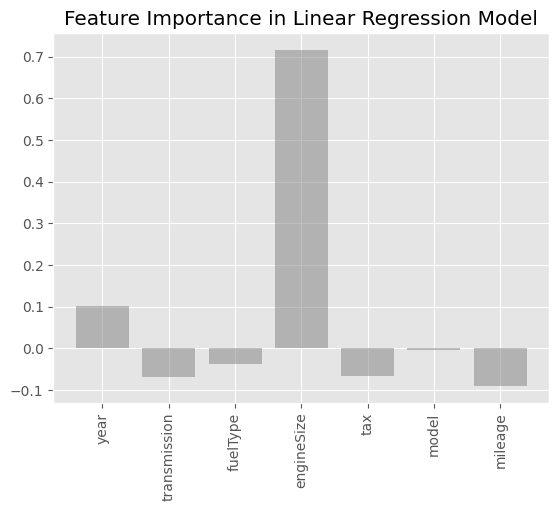

In [26]:
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = lr.coef_[i]

plt.bar(resultdict.keys(),resultdict.values(), alpha=0.5,color='gray')
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Linear Regression Model');

Decision Tree Regression Model

In [27]:
tree = DecisionTreeRegressor(max_depth=12,min_samples_split=2,random_state=42)
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)

In [28]:
d_r2 = tree.score(X_test, y_test)
print("Decision Tree Regressor R-squared: {}".format(d_r2))

d_mse = mean_squared_error(np.exp(y_pred2), np.exp(y_test))
d_rmse = np.sqrt(d_mse)
print("Decision Tree Regressor RMSE: {}".format(d_rmse))

Decision Tree Regressor R-squared: 0.9373013492227618
Decision Tree Regressor RMSE: 1611.402820144121


Finding the best parameter for Decision Tree Regression Model

Best max_depth is: 12 
Testing R^2 is: 0.9373013492227618


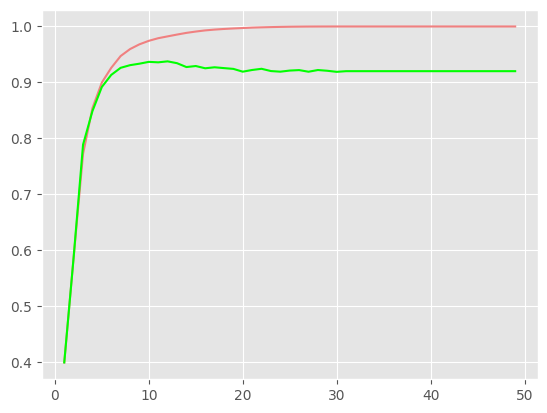

In [29]:
train_score = []
test_score = []
max_score = 0
max_pair = (0,0)

for i in range(1,50):
    tree = DecisionTreeRegressor(max_depth=i,random_state=42)
    tree.fit(X_train,y_train)
    y_pred = tree.predict(X_test)
    train_score.append(tree.score(X_train,y_train))
    test_score.append(r2_score(y_test,y_pred))
    test_pair = (i,r2_score(y_test,y_pred))
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

fig, ax = plt.subplots()
ax.plot(np.arange(1,50), train_score, label = "Training R^2",color='lightcoral')
ax.plot(np.arange(1,50), test_score, label = "Testing R^2",color='lime')
print(f'Best max_depth is: {max_pair[0]} \nTesting R^2 is: {max_pair[1]}')

Finding the feature importance

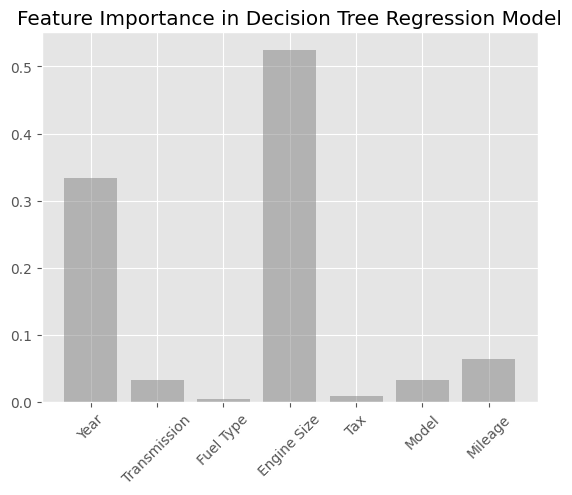

In [30]:
importance = tree.feature_importances_
new_column_names=['Year','Transmission', 'Fuel Type','Engine Size','Tax','Model','Mileage']
f_importance = {}
for i in range(len(feature_cols)):
     f_importance[new_column_names[i]] = importance[i]
        
plt.bar(f_importance.keys(),f_importance.values(),alpha=0.5,color='gray')
plt.xticks(rotation=45)
plt.title('Feature Importance in Decision Tree Regression Model');

Results

The R squared of the Linear Regression, and the Decision Tree Regression model is 0.86 and 0.94, meaning the Decision Tree Regression model fits the features better. The RMSE of the Linear Regression, and the Decision Tree Regression model is 2491 and 1611, meaning the Decision Tree Regression model has less error in predicting values.

Evaluate by Business Criteria

The company wants to avoid prediction out of a range - within 10% of the actual price. Therefore, we would consider using percentage of predictions within 10% of the actual price as a KPI to compare the two models again. The higher the percentage, the better the model performs. 69.4% of the decision tree regressor prediction is within 10% of the actual price, while the linear regression model only have 61.8%.

In [31]:
X_test['Predicted_price'] = np.round(np.exp(y_pred),0)
X_test['Price'] = np.round(np.exp(y_test),0)
lr_e = X_test
lr_e['Diff'] = (lr_e['Predicted_price'] - lr_e['Price'])/lr_e['Price']
within_10pct = len([d for d in lr_e['Diff'] if abs(d) <= 0.1])
pct_lr = within_10pct/len(lr_e['Diff'])       
print(f'Percentage of predictions within +/- 10% range: {pct_lr}')

Percentage of predictions within +/- 10% range: 0.6181998021760633


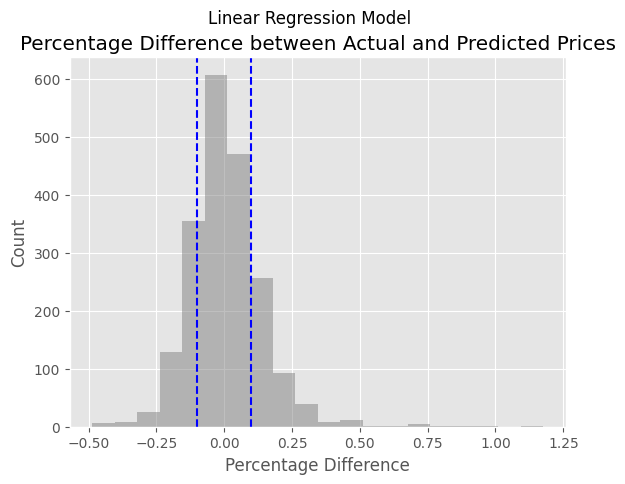

In [32]:
lr_e['Diff'] = (lr_e['Predicted_price'] - lr_e['Price'])/lr_e['Price']
plt.hist(lr_e['Diff'], bins=20, color='gray',alpha=0.5)
plt.axvline(x=0.1, color='b', linestyle='--', label='+/- 10% range')
plt.axvline(x=-0.1, color='b', linestyle='--')
plt.title('Percentage Difference between Actual and Predicted Prices')
plt.suptitle('Linear Regression Model')
plt.xlabel('Percentage Difference')
plt.ylabel('Count');

In [33]:
X_test['Predicted_price'] = np.round(np.exp(y_pred2),0)
X_test['Price'] = np.round(np.exp(y_test),0)
tree_e = X_test
tree_e['Diff'] = (tree_e['Predicted_price'] - tree_e['Price'])/tree_e['Price']
within_10pct = len([d for d in tree_e['Diff'] if abs(d) <= 0.1])
pct_tree = within_10pct/len(tree_e['Diff'])       
print(f'Percentage of predictions within +/- 10% range: {pct_tree}')

Percentage of predictions within +/- 10% range: 0.6943620178041543


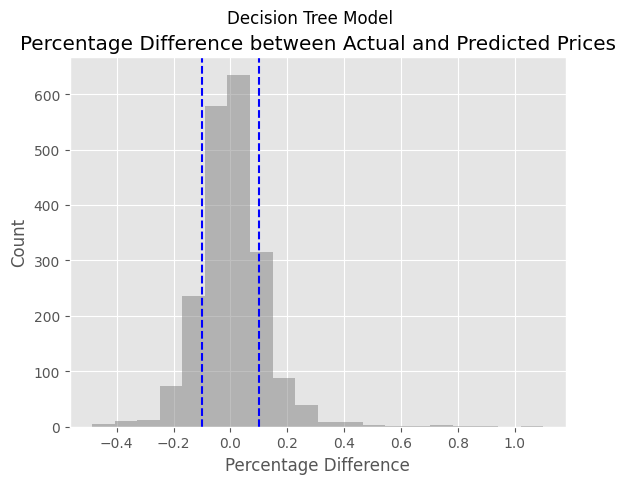

In [34]:
plt.hist(tree_e['Diff'], bins=20,color='gray', alpha=0.5)
plt.axvline(x=0.1, color='b', linestyle='--', label='+/- 10% range')
plt.axvline(x=-0.1, color='b', linestyle='--')
plt.title('Percentage Difference between Actual and Predicted Prices')
plt.suptitle('Decision Tree Model')
plt.xlabel('Percentage Difference')
plt.ylabel('Count');

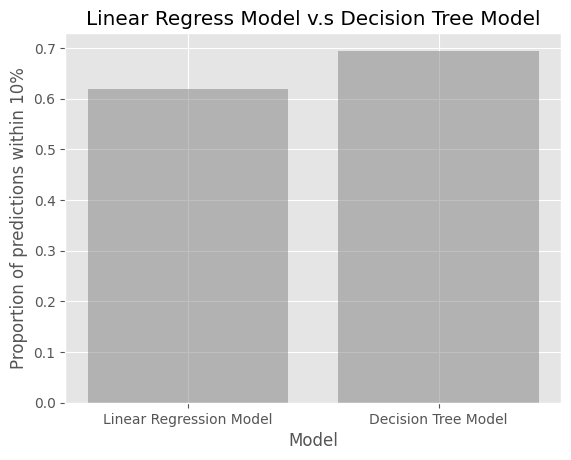

In [35]:
da = [pct_lr,pct_tree]
labels =['Linear Regression Model','Decision Tree Model']
plt.bar(labels, da,color='gray', alpha=0.5)


# Add labels to the chart
plt.title('Linear Regress Model v.s Decision Tree Model')
plt.xlabel('Model')
plt.ylabel('Proportion of predictions within 10%')

# Show the chart
plt.show()

Recommendation

To smooth out the difficulities we might face when the most experienced sales team member retires, we can plan to deploy this Decision Tree Regression Model into production. By implementing this model, about 70% of the prediction will within 10% of the price. This will help automate the whole process and sell cars quicker. I will recommend the following steps to ensure the model can be deployed and improved regularly.

Test the model in the recent month and compare its prediction to the estimations of the experienced member on new cars.

Identify and fix errors to improve accuracy after testing.

Fully deploy the model using efficient deployment strategy, such as a web or mobile application or API.

Continuously improve the model by collecting more data, feature engineer and fine tuning parameter. This would be the key points to address the limitation from the year and car model variable.